# Clustering de usuarios de teléfono móvil utilizando K-means

---



Partiendo de las múltiples acciones que realizan los usuarios de los teléfonos móviles como conjunto de datos, utilizaremos un **algoritmo no supervisado** de machine learning de **K-means** sobre el conjunto de datos escalado y reducido del inicial para encontrar el número adecuado de clusters de los datos de entrada.

### Importar las librerías necesarias y lectura del conjunto de datos

*   En primer lugar, se importan las librerias necesarias de **Python** para el tratamiento de los datos, generación de gráficas y generación del modelo.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook
%matplotlib inline

* En segundo lugar, se realiza la lectura de los ficheros en los que se encuentra el conjunto de datos, En este caso tendremos dos ficheros de entrenamiento y dos ficheros de prueba con extensión .txt y se copiará su contenido en variables de tipo **array** de **numpy** utilizando el método ***loadtxt()***.

In [0]:
x_train = np.loadtxt("samsung_train.txt")
x_test = np.loadtxt("samsung_test.txt")
y_train = np.loadtxt("samsung_train_labels.txt")
y_test = np.loadtxt("samsung_test_labels.txt")

* Después visualizamos el tamaño de los datasets. Observamos que los datsets contienen un número muy alto de variables de entrada, en total 561 variables.

In [3]:
print("Tamaño x_train:", x_train.shape)
print("Tamaño x_test :", x_test.shape)

Tamaño x_train: (7352, 561)
Tamaño x_test : (2947, 561)


### PCA para reducir la dimensionalidad

Antes de aplicar un modelo K-means vamos a utilizar PCA para reducir la dimensionalidad de los datos de entrada iniciales

En primer lugar vamos a obtener nuestras variables de entrada y salida (x, y) utilizando los métodos ***vstack()*** y ***hstack()*** de numpy respectivamente.

In [0]:
x = np.vstack([x_train, x_test])
y = np.hstack([y_train, y_test])

Antes de utilizar un algoritmo PCA es recomendable **escalar** los datos, para ello utilizaremos el método ***StandardScaler()*** de la librería **sklearn** para generar una instancia y el método de la instancia ***fit_transform()***

In [0]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Inicializamos el modelo llamando a una instancia de ***PCA()*** de la librería ***sklearn***. Configuramos el algoritmo para obtener un 90% de los datos originales.

Llamando al método ***fit()*** en la instancia del modelo y pasando por parámetro al método el dataset completo, el algoritmo entrena y genera nuestro modelo.

Por último llamando al método ***transform()*** en la instancia del modelo y pasando por parámetro al método el dataset escalado, el algoritmo genera un dataset con la dimensionalidad reducida.

In [0]:
modeloPCA = PCA(n_components=0.9)
modeloPCA.fit(x_scaled)
x_pca = modeloPCA.transform(x_scaled)

El objetivo de PCA es la **reducción de dimensionalidad** del dataset inicial, eso implica perder un porcentaje del dataset inicial, en nuestro caso ha sido un 10%, sin embargo habremos optimizado nuestro dataset con el menor número de variables posibles que contenga la mayor información posible para generar un modelo.

Averiguando el tamaño de nuestro dataset generado por PCA, observamos que hemos pasado de 561 variables a 36 variables. Lo que significa que en estas 65 variables tenemos el 90% de la información del dataset inicial.

In [7]:
print("Tamaño x_pca:", x_pca.shape)

Tamaño x_pca: (10299, 65)


Finalmente podemos **aproximarnos al número de clusters**, visualizando en una gráfica que en principio hay 2 clusters bien definidos. La gráfica muestra las dos variables con mayor número de varianza del conjunto de datos.

* El primer cluster se aprecia en colores amarillo y verde claro.
* El segundo cluster se aprecia en colores azul y violeta.

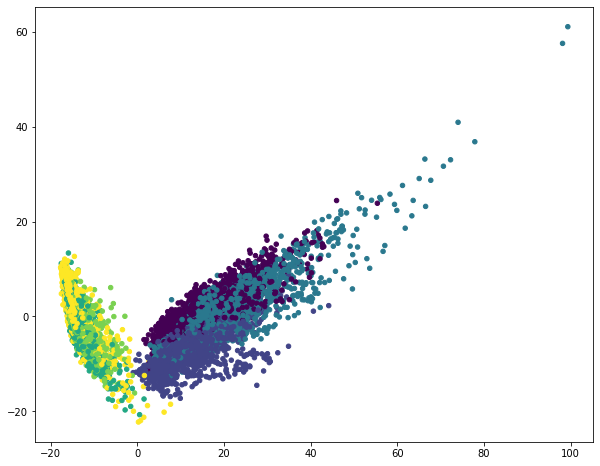

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, s=20, cmap='viridis');

### K-means para encontrar el número de clusters

Inicialmente conocemos los valores o etiquetas de la variable de salida ya que se encuentran en el dataset:

* 1 – walking
* 2 – walking upstairs
* 3 – walking downstairs
* 4 – sitting
* 5 – standing
* 6 – laying down

En un principio vamos a utilizar el número total de valores únicos que tenemos en la variable de salida.

In [9]:
n_y = np.unique(y).size
n_y

6

Inicializamos el modelo llamando a una instancia de ***KMeans()*** de la librería ***sklearn***. Configuramos el algoritmo para tener 6 clusters.

Llamando al método **fit()** en la instancia del modelo y pasando por parámetro al método el dataset obtenido por PCA, el algoritmo entrena y genera nuestro modelo.

Finalmente vamos a obtener las etiquetas finales que identifican cada observación y que están asociadas a un determinado cluster.


In [0]:
modeloKM = KMeans(n_clusters=n_y, n_init=100, n_jobs=1)
modeloKM.fit(x_pca)
etiquetas_cluster = modeloKM.labels_

Se puede **visualizar el número de clusters** en una gráfica, en este caso se distinguen 6 clusters.

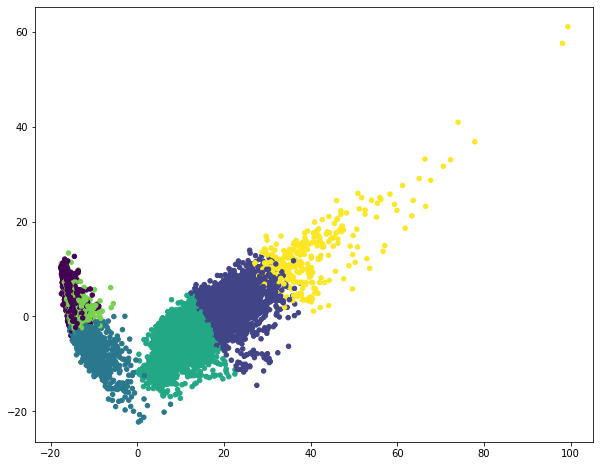

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=etiquetas_cluster, s=20, cmap='viridis');

Podemos visualizar en una tabla el número valores con la clasificación inicial que ahora pertenecen a cada una de las 6 etiquetas de cluster.

In [12]:
tabla_clusters = pd.crosstab(y, etiquetas_cluster)
tabla_clusters.index = ['walking', 'going up the stairs', 'going down the stairs', 'sitting', 'standing', 'laying']
tabla_clusters.columns = ['cluster' + str(i + 1) for i in range(6)]
tabla_clusters

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6
walking,0,741,0,903,0,78
going up the stairs,0,296,2,1241,0,5
going down the stairs,0,890,0,320,0,196
sitting,91,0,450,1,1235,0
standing,0,0,562,0,1344,0
laying,1558,0,329,5,52,0


### Método Elbow para calcular el número de clusters

Aunque inicialmente y puesto que teniamos seis posibles clasificadores de salida en nuestro dataset hemos probado a generar un modelo con un algoritmo K-Means configurado para 6 clusters, el objetivo de K-Means es encontrar el número óptimo de clusters para las variables de entrada del datset.

Con el método Elbow podemos estimar ese número óptimo de clusters, observando en que valor de un rango determinado la gráfica marca la forma de un codo. 

In [13]:
inertia = []
for k in tqdm_notebook(range(1, n_y + 1)):
    kmeans = KMeans(n_clusters=k, n_init=100, n_jobs=1).fit(x_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

Se puede apreciar que en el valor 2 hay un codo o punto dónde la gráfica pasa de vertical a horizontal.

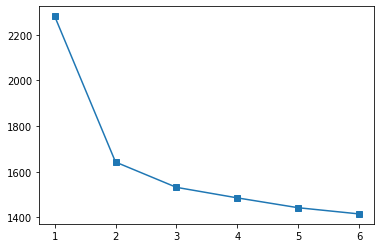

In [14]:
plt.plot(range(1, 7), inertia, marker='s');

In [0]:
modeloKM = KMeans(n_clusters=2, n_init=100, random_state=17, n_jobs=1)
modeloKM.fit(x_pca)
etiquetas_cluster = modeloKM.labels_

Se puede **visualizar el número de clusters** en una gráfica, en este caso se distinguen dos clusters.

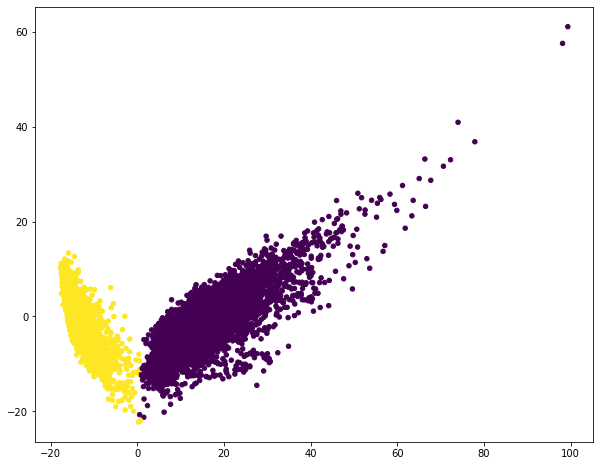

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=etiquetas_cluster, s=20, cmap='viridis');

Podemos visualizar en una tabla el número valores con la clasificación inicial que ahora pertenecen a cada una de las dos etiquetas de cluster.

In [17]:
tabla_clusters = pd.crosstab(y, etiquetas_cluster)
tabla_clusters.index = ['walking', 'going up the stairs', 'going down the stairs', 'sitting', 'standing', 'laying']
tabla_clusters.columns = ['cluster' + str(i + 1) for i in range(2)]
tabla_clusters

,cluster1,cluster2
walking,1722,0
going up the stairs,1536,8
going down the stairs,1406,0
sitting,3,1774
standing,0,1906
laying,12,1932
